# Data Loading tutorial

To add the competition data Click File->Add or Upload data-> Search by URL -> https://www.kaggle.com/geoparslp/patreco3-multitask-affective-music

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[:1]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import os

# Define the repository URL and the folder name
repo_url = "https://github.com/slp-ntua/patrec-labs.git"
folder_name = "patrec-labs"

# Check if the directory already exists
if not os.path.exists(folder_name):
    !git clone {repo_url}
else:
    print(f"The repository '{folder_name}' is already cloned.")

The repository 'patrec-labs' is already cloned.


In [14]:
import sys
import os

# Get the absolute path of the cloned 'patrec-labs' folder
repo_path = os.path.join(os.getcwd(), folder_name, 'lab3')

# Add the 'lab3' folder path to the system path
sys.path.append(repo_path)

In [15]:
# install requirements
!pip install -r patrec-labs/lab3/requirements.txt

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

### Load a sample file

In [6]:
spec = np.load('/kaggle/input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/train/80238.fused.full.npy')

This is a fused spectrogram + chromagram. The shape is (mel + chroma frequencies, timesteps)

In [7]:
print(spec.shape)  # (frequencies x time steps)

(140, 1293)


To decompose into the mel spectrogram and chromagram you can run:

In [8]:
mel, chroma = spec[:128], spec[128:]

In [9]:
print(mel.shape, chroma.shape)

(128, 1293) (12, 1293)


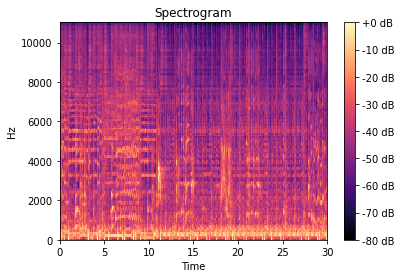

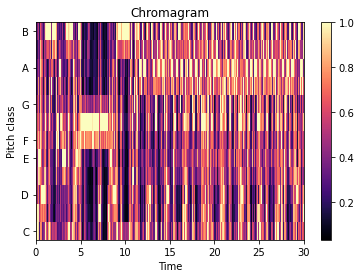

In [10]:
# Plot the spectrogram and the chromagram

import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
img = librosa.display.specshow(mel, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")


fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram')
fig.colorbar(img, ax=ax)

## Creating Pytorch Datasets

We import the necessary modules from the helper code evident at the respective repository:

In [11]:
from dataset import SpectrogramDataset, CLASS_MAPPING, torch_train_val_split

### Initialize a pytorch dataset for beat synced mel spectrograms

In [12]:
beat_mel_specs = SpectrogramDataset(
     '../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/', class_mapping=CLASS_MAPPING, 
    train=True, feat_type='mel', max_length=-1
)
    
train_loader_beat_mel, val_loader_beat_mel = torch_train_val_split(beat_mel_specs, 32 ,32, val_size=.33)

Lets see an example sample from the dataset

In [13]:
datum = next(iter(train_loader_beat_mel))
print('Data shape')
print(datum[0].shape)  # shape of data
print('Labels')
print(datum[1])  # labels in batch
print('Lengths')
print(datum[2])  # length of each element in batch

Data shape
torch.Size([32, 129, 128])
Labels
tensor([1, 4, 3, 6, 8, 6, 3, 3, 3, 7, 4, 5, 0, 5, 4, 3, 4, 5, 9, 9, 7, 8, 1, 6,
        2, 2, 1, 5, 8, 8, 5, 8])
Lengths
tensor([ 53,  58,  26,  79,  65,  73,  95,  70,  71,  51,  47,  54,  43,  66,
         85,  54,  41,  46,  86,  45,  70, 106,  54,  74,  54,  49,  83,  49,
         29,  62,  48,  66])


#### Initialize a pytorch dataset for beat synced chromagrams


In [14]:
beat_chroma = SpectrogramDataset(
     '../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/', class_mapping=CLASS_MAPPING, 
    train=True, feat_type='chroma', max_length=-1
)
    
train_loader_beat_chroma, val_loader_beat_chroma = torch_train_val_split(beat_chroma, 32 ,32, val_size=.33)

Lets see an example sample from the beat chroma dataset

In [15]:
datum = next(iter(train_loader_beat_chroma))
print('Data shape')
print(datum[0].shape)  # shape of data
print('Labels')
print(datum[1])  # labels in batch
print('Lengths')
print(datum[2])  # length of each element in batch

Data shape
torch.Size([32, 129, 12])
Labels
tensor([0, 1, 1, 8, 8, 9, 3, 4, 9, 9, 9, 5, 2, 3, 8, 6, 2, 6, 1, 3, 2, 1, 6, 6,
        2, 5, 8, 2, 9, 1, 3, 4])
Lengths
tensor([ 57,  39, 107,  46,  62,  49,  58,  47,  38,  44,  42,  45,  60,  53,
         65,  70,  68,  46,  67,  46,  51,  54,  55,  79,  62,  34,  67,  73,
         47,  65,  33,  48])


#### Initialize a pytorch dataset for the fused spectrogram + chromagram for the full (non-beat-synced) data


In [16]:
specs_fused = SpectrogramDataset(
     '../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/', class_mapping=CLASS_MAPPING, 
    train=True, feat_type='fused', max_length=-1
)

train_loader, val_loader = torch_train_val_split(specs_fused, 32 ,32, val_size=.33)

In [17]:
datum = next(iter(train_loader))
print('Data shape')
print(datum[0].shape)  # shape of data
print('Labels')
print(datum[1])  # labels in batch
print('Lengths')
print(datum[2])  # length of each element in batch

Data shape
torch.Size([32, 1293, 140])
Labels
tensor([4, 6, 7, 0, 0, 9, 2, 2, 0, 0, 0, 8, 6, 6, 1, 6, 3, 2, 3, 8, 3, 2, 9, 3,
        5, 8, 2, 2, 8, 8, 8, 7])
Lengths
tensor([1293, 1291, 1293, 1292, 1291, 1291, 1293, 1291, 1293, 1291, 1291, 1291,
        1293, 1293, 1291, 1291, 1293, 1291, 1291, 1291, 1291, 1291, 1291, 1291,
        1291, 1293, 1293, 1291, 1291, 1292, 1293, 1291])


In [18]:
# Step 4: Data loading and analysis
from dataset import CLASS_MAPPING, SpectrogramDataset

PARENT_DATA_DIR = '../input/patreco3-multitask-affective-music/data/'

train_dataset = SpectrogramDataset(
    os.path.join(PARENT_DATA_DIR, 'fma_genre_spectrograms'), class_mapping=CLASS_MAPPING, train=True
)

print(train_dataset[10])
print(f"Input: {train_dataset[10][0].shape}")
print(f"Label: {train_dataset[10][1]}")
print(f"Original length: {train_dataset[10][2]}")

(array([[-52.26681477, -52.71678237, -52.83256794, ..., -80.        ,
        -80.        , -80.        ],
       [-45.12944043, -49.20641678, -51.77639735, ..., -80.        ,
        -80.        , -80.        ],
       [-44.2435711 , -42.88079978, -46.60278858, ..., -80.        ,
        -80.        , -80.        ],
       ...,
       [-38.86648128, -42.70998466, -46.1181    , ..., -58.58672545,
        -61.70087117, -63.41518897],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]]), 0, 1291)
Input: (1293, 128)
Label: 0
Original length: 1291


In [19]:
def plot_class_histogram(dataset, title):
    plt.figure()
    plt.hist(dataset.labels, rwidth=0.5, align='mid')
    plt.xticks(dataset.labels, dataset.labels.astype(str))
    plt.title(title)
    plt.xlabel('Class Labels')
    plt.ylabel('Frequencies')

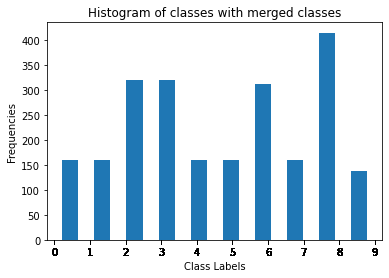

In [20]:
plot_class_histogram(train_dataset, title='Histogram of classes with merged classes')

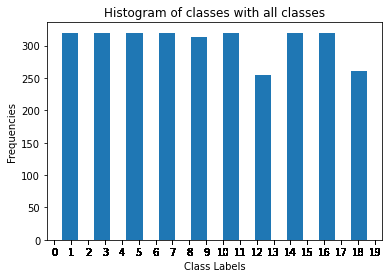

In [21]:
train_dataset_all = SpectrogramDataset(
    os.path.join(PARENT_DATA_DIR, 'fma_genre_spectrograms'), class_mapping=None, train=True
)
plot_class_histogram(train_dataset_all, title='Histogram of classes with all classes')

In [23]:
# dataloaders for specific features type, e.g. 'mel'
BATCH_SIZE = 8
MAX_LENGTH = 150
DEVICE = 'cuda'

train_dataset = SpectrogramDataset(
    os.path.join(PARENT_DATA_DIR, 'fma_genre_spectrograms'), class_mapping=CLASS_MAPPING, 
    train=True, feat_type='mel', max_length=MAX_LENGTH
)

train_loader, val_loader = torch_train_val_split(
    train_dataset, BATCH_SIZE, BATCH_SIZE
)

# get the 1st batch values of the data loader
x_b1, y_b1, lengths_b1 = next(iter(train_loader))

# print the shape of the 1st item of the 1st batch of the data loader
input_shape = x_b1[0].shape
print(input_shape)

torch.Size([150, 128])


In [28]:
# we need EarlyStopping that we'll adopt from: https://stackoverflow.com/a/73704579/19306080 and add some customizations

class EarlyStopper:
    def __init__(self, model, save_path, patience=1, min_delta=0):
        self.model = model
        self.save_path = save_path
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
            torch.save(self.model.state_dict(), self.save_path)
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [33]:
# implemetation of the training process

def train_one_epoch(model, train_loader, optimizer, device=DEVICE):
    model.train()
    total_loss = 0
    for x, y, lengths in train_loader:        
        loss, logits = model(x.float().to(device), y.to(device), lengths.to(device))
        # prepare
        optimizer.zero_grad()
        # backward
        loss.backward()
        # optimizer step
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)    
    return avg_loss


def validate_one_epoch(model, val_loader, device=DEVICE):    
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x, y, lengths in val_loader:
            loss, logits = model(x.float().to(device), y.to(device), lengths.to(device))
            total_loss += loss.item()
    
    avg_loss = total_loss / len(val_loader)    
    return avg_loss


In [34]:
import torch
import torch.nn as nn

def overfit_with_a_couple_of_batches(model, train_loader, optimizer, device):
    print('Training in overfitting mode...')
    epochs = 400
    
    # get only the 1st batch
    x_b1, y_b1, lengths_b1 = next(iter(train_loader))    
    model.train()
    for epoch in range(epochs):        
        loss, logits = model(x_b1.float().to(device), y_b1.to(device), lengths_b1.to(device))
        # prepare
        optimizer.zero_grad()
        # backward
        loss.backward()
        # optimizer step
        optimizer.step()

        if epoch == 0 or (epoch+1)%20 == 0:
            print(f'Epoch {epoch+1}, Loss at training set: {loss.item()}')

def train(model, train_loader, val_loader, optimizer, epochs, save_path='checkpoint.pth', device="cuda", overfit_batch=False):
    if overfit_batch:
        overfit_with_a_couple_of_batches(model, train_loader, optimizer, device)
    else:
        print(f'Training started for model {save_path.replace(".pth", "")}...')
        early_stopper = EarlyStopper(model, save_path, patience=5)
        for epoch in range(epochs):
            train_loss = train_one_epoch(model, train_loader, optimizer)
            validation_loss = validate_one_epoch(model, val_loader)
            if epoch== 0 or (epoch+1)%5==0:
                print(f'Epoch {epoch+1}/{epochs}, Loss at training set: {train_loss}\n\tLoss at validation set: {validation_loss}')          
            
            if early_stopper.early_stop(validation_loss):
                print('Early Stopping was activated.')
                print(f'Epoch {epoch+1}/{epochs}, Loss at training set: {train_loss}\n\tLoss at validation set: {validation_loss}')
                print('Training has been completed.\n')
                break

In [35]:
class Classifier(nn.Module):
    def __init__(self, num_classes, backbone, load_from_checkpoint=None):
        """
        backbone (nn.Module): The nn.Module to use for spectrogram parsing
        num_classes (int): The number of classes
        load_from_checkpoint (Optional[str]): Use a pretrained checkpoint to initialize the model
        """
        super(Classifier, self).__init__()
        self.backbone = backbone  # An LSTMBackbone or CNNBackbone
        if load_from_checkpoint is not None:
            self.backbone = load_backbone_from_checkpoint(
                self.backbone, load_from_checkpoint
            )
        self.is_lstm = isinstance(self.backbone, LSTMBackbone)
        self.output_layer = nn.Linear(self.backbone.feature_size, num_classes)
        self.criterion = nn.CrossEntropyLoss()  # Loss function for classification

    def forward(self, x, targets, lengths):
        feats = self.backbone(x) if not self.is_lstm else self.backbone(x, lengths)
        logits = self.output_layer(feats)
        loss = self.criterion(logits, targets)
        return loss, logits

In [31]:
# run Training in overfitting mode
from lstm import LSTMBackbone

DEVICE = 'cuda' 
RNN_HIDDEN_SIZE = 64
NUM_CATEGORIES = 10

LR = 1e-4
epochs = 10

backbone = LSTMBackbone(input_shape[1], rnn_size=RNN_HIDDEN_SIZE, num_layers=2, bidirectional=True)
model = Classifier(NUM_CATEGORIES, backbone)
model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)

train(model, train_loader, val_loader, optimizer, epochs, device=DEVICE, overfit_batch=True)

Training in overfitting mode...
Epoch 1, Loss at training set: 2.2925045490264893
Epoch 20, Loss at training set: 2.0428879261016846
Epoch 40, Loss at training set: 1.8118970394134521
Epoch 60, Loss at training set: 1.5719000101089478
Epoch 80, Loss at training set: 1.3331295251846313
Epoch 100, Loss at training set: 1.0631203651428223
Epoch 120, Loss at training set: 0.784835696220398
Epoch 140, Loss at training set: 0.515079915523529
Epoch 160, Loss at training set: 0.30792099237442017
Epoch 180, Loss at training set: 0.20461824536323547
Epoch 200, Loss at training set: 0.1312541514635086
Epoch 220, Loss at training set: 0.10049225389957428
Epoch 240, Loss at training set: 0.07409950345754623
Epoch 260, Loss at training set: 0.07493478059768677
Epoch 280, Loss at training set: 0.06183832883834839
Epoch 300, Loss at training set: 0.05707372725009918
Epoch 320, Loss at training set: 0.04337053745985031
Epoch 340, Loss at training set: 0.04331574961543083
Epoch 360, Loss at training set

In [36]:
# run Training
DEVICE = 'cuda'
RNN_HIDDEN_SIZE = 128
NUM_CATEGORIES = 10

LR = 1e-4
epochs = 40
save_path='lstm_genre_mel.pth'

backbone = LSTMBackbone(input_shape[1], rnn_size=RNN_HIDDEN_SIZE, num_layers=2, bidirectional=True)
model = Classifier(NUM_CATEGORIES, backbone)
model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)

train(model, train_loader, val_loader, optimizer, epochs, save_path=save_path, device=DEVICE, overfit_batch=False)

Training started for model lstm_genre_mel...
Epoch 1/40, Loss at training set: 2.186451095007199
	Loss at validation set: 2.0772649522485405
Epoch 5/40, Loss at training set: 1.920344193260391
	Loss at validation set: 1.8719276970830456
Epoch 10/40, Loss at training set: 1.8810015844576287
	Loss at validation set: 1.8149321593087295
Epoch 15/40, Loss at training set: 1.8042456866342784
	Loss at validation set: 1.8081707091167056
Early Stopping was activated.
Epoch 17/40, Loss at training set: 1.7962352826997832
	Loss at validation set: 1.821236589859272
Training has been completed.



In [43]:
from sklearn.metrics import classification_report

def get_labels_predictions(model, data_loader, device):
    model.eval()
    y = []
    y_ = []
    with torch.no_grad():
        for x, labels, lengths in data_loader:
            loss, logits = model(x.float().to(device), labels.to(device), lengths.to(device))
            y.append(labels)
            y_.append(logits.argmax(dim=-1).detach().cpu().numpy())

    return y, y_ 

In [44]:
data_dir = 'fma_genre_spectrograms'
saved_model_path = 'lstm_genre_mel.pth'

print(f'Evaluation of model {saved_model_path.replace(".pth", "")} on the test set...')

test_dataset = SpectrogramDataset(
    os.path.join(PARENT_DATA_DIR, data_dir), class_mapping=CLASS_MAPPING, 
    train=False, feat_type='mel', max_length=MAX_LENGTH
)

test_loader, _ = torch_train_val_split(
    test_dataset, BATCH_SIZE, BATCH_SIZE, val_size=0.0
)

# get the input shape
x_b1, y_b1, lengths_b1 = next(iter(test_loader))
input_shape = x_b1[0].shape

backbone = LSTMBackbone(input_shape[1], rnn_size=RNN_HIDDEN_SIZE, num_layers=2, bidirectional=True)
model = Classifier(NUM_CATEGORIES, backbone)
model.to(DEVICE)
model.load_state_dict(torch.load(saved_model_path))

y, y_ = get_labels_predictions(model, test_loader, DEVICE)
print(classification_report(np.hstack(y), np.hstack(y_)))

Evaluation of model lstm_genre_mel on the test set...
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.41      0.53      0.46        40
           2       0.26      0.78      0.39        80
           3       0.38      0.40      0.39        80
           4       0.33      0.03      0.05        40
           5       0.00      0.00      0.00        40
           6       0.31      0.05      0.09        78
           7       0.00      0.00      0.00        40
           8       0.33      0.58      0.42       103
           9       0.00      0.00      0.00        34

    accuracy                           0.31       575
   macro avg       0.20      0.24      0.18       575
weighted avg       0.24      0.31      0.23       575



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# 2D CNN

# copy paste from convolution.py and add the implementation
import torch
import torch.nn as nn

class CNNBackbone(nn.Module):
    def __init__(self, input_dims, in_channels, filters, feature_size):
        super(CNNBackbone, self).__init__()
        self.input_dims = input_dims
        self.in_channels = in_channels
        self.filters = filters
        self.feature_size = feature_size
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(self.in_channels, filters[0], kernel_size=(5,5), stride=1, padding=2),
            nn.BatchNorm2d((self.in_channels**1) * filters[0]),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.conv2 = nn.Sequential(
                nn.Conv2d(filters[0], filters[1], kernel_size=(5,5), stride=1, padding=2),
                nn.BatchNorm2d((self.in_channels**2) * filters[1]),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2))

        self.conv3 = nn.Sequential(
                nn.Conv2d(filters[1], filters[2], kernel_size=(3,3), stride=1, padding=1),
                nn.BatchNorm2d((self.in_channels**3) * filters[2]),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2))

        self.conv4 = nn.Sequential(
                nn.Conv2d(filters[2], filters[3], kernel_size=(3,3), stride=1, padding=1),
                nn.BatchNorm2d((self.in_channels**4) * filters[3]),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2))
        
        shape_after_convs = [input_dims[0]//2**(len(filters)), input_dims[1]//2**(len(filters))]
        self.fc1 = nn.Linear(filters[3] * shape_after_convs[0] * shape_after_convs[1], self.feature_size)
        
    def forward(self, x):
        x = x.view(x.shape[0], self.in_channels, x.shape[1], x.shape[2])
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        return out

In [46]:
# run Training in overfitting mode for the CNN 
DEVICE = 'cuda'
NUM_CATEGORIES = 10
cnn_in_channels = 1
cnn_filters = [32, 64, 128, 256]
cnn_out_feature_size = 1000

LR = 1e-4
epochs = 10

# get the input shape
x_b1, y_b1, lengths_b1 = next(iter(train_loader))
input_shape = x_b1[0].shape

backbone = CNNBackbone(input_shape, cnn_in_channels, cnn_filters, cnn_out_feature_size)
model = Classifier(NUM_CATEGORIES, backbone)
model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)

train(model, train_loader, val_loader, optimizer, epochs, device=DEVICE, overfit_batch=True)

Training in overfitting mode...
Epoch 1, Loss at training set: 2.3914988040924072
Epoch 20, Loss at training set: 0.00012517279537860304
Epoch 40, Loss at training set: 2.4779423256404698e-05
Epoch 60, Loss at training set: 1.588419581821654e-05
Epoch 80, Loss at training set: 1.1682277545332909e-05
Epoch 100, Loss at training set: 9.074670742847957e-06
Epoch 120, Loss at training set: 7.301483037736034e-06
Epoch 140, Loss at training set: 6.07961555942893e-06
Epoch 160, Loss at training set: 5.155760845809709e-06
Epoch 180, Loss at training set: 4.425615315994946e-06
Epoch 200, Loss at training set: 3.874280082527548e-06
Epoch 220, Loss at training set: 3.397447926545283e-06
Epoch 240, Loss at training set: 3.0249225346778985e-06
Epoch 260, Loss at training set: 2.7269020392850507e-06
Epoch 280, Loss at training set: 2.473584117979044e-06
Epoch 300, Loss at training set: 2.235167357866885e-06
Epoch 320, Loss at training set: 2.026552238021395e-06
Epoch 340, Loss at training set: 1.862

In [47]:
train(model, train_loader, val_loader, optimizer, epochs, device=DEVICE, overfit_batch=False)

Training started for model checkpoint...
Epoch 1/10, Loss at training set: 4.438097212995801
	Loss at validation set: 2.7009637088611207
Epoch 5/10, Loss at training set: 1.7643467283352112
	Loss at validation set: 2.029706060886383
Epoch 10/10, Loss at training set: 1.274768475588266
	Loss at validation set: 1.9006667414615894


In [48]:
# add implementation of Regressor

class Regressor(nn.Module):
    def __init__(self, backbone, load_from_checkpoint=None):
        """
        backbone (nn.Module): The nn.Module to use for spectrogram parsing
        load_from_checkpoint (Optional[str]): Use a pretrained checkpoint to initialize the model
        """
        super(Regressor, self).__init__()
        self.backbone = backbone  # An LSTMBackbone or CNNBackbone
        if load_from_checkpoint is not None:
            self.backbone = load_backbone_from_checkpoint(
                self.backbone, load_from_checkpoint
            )
        self.is_lstm = isinstance(self.backbone, LSTMBackbone)
        self.output_layer = nn.Linear(self.backbone.feature_size, 1)
        self.criterion = nn.MSELoss()  # Loss function for regression

    def forward(self, x, targets, lengths):
        feats = self.backbone(x) if not self.is_lstm else self.backbone(x, lengths)
        out = self.output_layer(feats)
        loss = self.criterion(out.float(), targets.float())
        return loss, out

In [14]:
import torch
import numpy as np

a = torch.tensor()
a

TypeError: tensor() missing 1 required positional arguments: "data"

In [22]:
y1 = torch.tensor([1, 2, 3, 4]).cpu().numpy()
y2 = torch.tensor([4, 3, 2, 1]).cpu().numpy()
y3 = np.array([1, 1, 1, 1, 1, 1, 1, 1])
y1

array([1, 2, 3, 4])

In [20]:
y4 = np.hstack((y1, y2))
y4

array([1, 2, 3, 4, 4, 3, 2, 1])

In [21]:
np.mean(y4 - y3)

np.float64(1.5)

In [34]:
ls = [y1, y2]
cr = torch.nn.MSELoss()
cr.__class__ == torch.nn.modules.loss.MSELoss

True

In [30]:
cr is torch.nn.MSELoss()

False